##Glass Classification Models: Softmax Regression, Support Vector Machines, Random Forests, and Ensemble Learning




Clayton Greenwell

The goal of this assignment is to explore different classification algorithms.



Resources used for reference in creating this notebook:


*   Code from class powerpoint slides
*   Code from the textbook: "Hands On Machine Learning"





**Information About The Dataset:**

The UC Irvine Glass Identification dataset can be found here: https://archive.ics.uci.edu/dataset/42/glass+identification


To be clear, we are classifying samples of glass into 6 possible classes.


*Features and Target:*

Id -- numeric identifier of the instance (glass ID number)

RI -- refractive index

NA -- Sodium oxide

Mg -- magnesium oxide

Al -- aluminum oxide

Si  -- silicon oxide

K -- potassium oxide

Ca -- calcium oxide

Ba -- barium oxide

Fe -- iron oxide

Type -- Type of Glass (categorical target)

*Class Labels*

1: building_windows (float processed)

2: building_windows (non-float processed)

3: vehicle_windows (float processed)

4: vehicle_windows (non-float processed) **(none in this dataset)**

5: containers

6: tableware

7: headlamps


The float process is a glass manufacturing method and has nothing to do with float datatypes. Two class labels are distinct in this dataset for being float processed.

Before we do anything, let's import our packages and our data. We can also do some immediate data cleaning.

By default, the dataset doesn't include column names, so we'll need to add them manually for clarity purposes. The column names can be found on the website the datasets come from, and have been placed into a list here.


In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set column names:

cols = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']

# Now we can load our datasets while also adding the column names

glass = pd.read_csv("glass.data", header = None,
                        names = cols)

In [2]:
# Let's look at our file:

glass

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
# We can also export this if we ever want to look at our dataset in its entirety:

glass.to_csv("glass.csv", index=False)

# **1. Statistical Values and Histograms**
Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [4]:
# Check for null values:
glass.isna().sum()

,0
Id,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0


Luckily we have no null values to worry about.

In [5]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Id and Type (the categorical target) are stored as integers. All features are stored as floats.


"Type" is categorical target with 6 possible integers. "Id" is an ID Number: 1 through 214. There are 9 features, and they are all continuous and numerical.

There are 214 records in the dataset (214 samples of glass).

In [6]:
glass.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


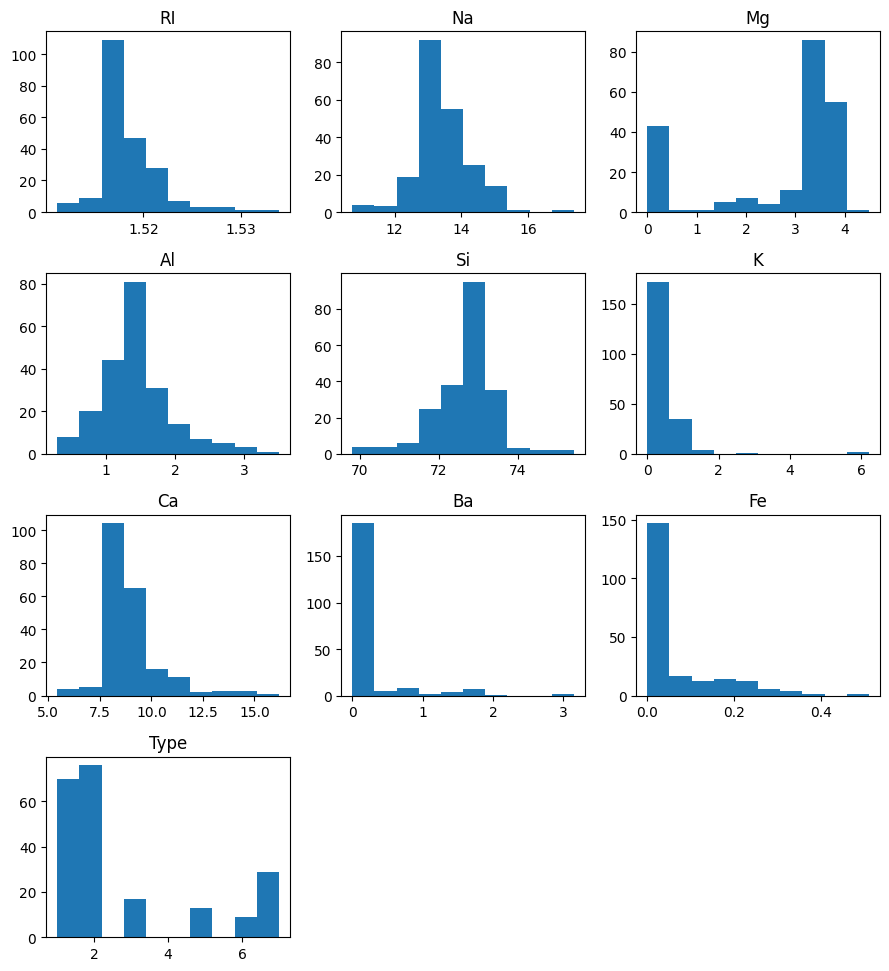

In [7]:
# drop the ID column momentarily for plotting

glass_drop_Id = glass.drop("Id", axis=1)

plt.figure(figsize = (9, 12))
for i, N in enumerate(glass_drop_Id.columns):
    plt.subplot(5, 3, i+1)
    plt.hist(glass_drop_Id[N])
    plt.title(N)
plt.tight_layout()

The first thing we notice is that Silicon Oxide (Si) has a near-perfect Normal distribution. Ri, Na, Ca, and Al all have fairly similar left-skewed distributions. Mg has a right-skewed distribiution. Fe and Ba have similar, dramatically left-skewed distributions.


Type, as a 6-class integer target, is of course odd looking and not ideal for a histogram format.

- Mg, Al, Ba and K have similar ranges, from 0 to ~5.
- Ca has a range of 5 to ~15.
- Fe has a very, very small range, from 0 to ~0.5.
- RI has a range from 0 to ~1.6.
- Na has a range from ~11 to 18.
- Si has a range from 69 to ~75.

To answer the question as to whether any attributes will need special treatment-- they will all need to be scaled, as they have dramatically different ranges.

# **2. Pearson Correlation Coefficients and Scatter Plots**
Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

In [8]:
continuous_features_1 = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe', 'Type']

In [9]:
label_column = 'Type'

# Calculate Pearson Correlation Coefficients
correlations = glass[continuous_features_1].corr()[label_column]

# Sort by absolute values but keep original signs
correlations_sorted = correlations.iloc[correlations.abs().argsort()[::-1]]

# Print the correlations
print(
    "Pearson Correlation Coefficients with "
    "'Category number' (Sorted by Absolute Value):\n"
)
print(correlations_sorted)

Pearson Correlation Coefficients with 'Category number' (Sorted by Absolute Value):

Type    1.000000
Mg     -0.744993
Al      0.598829
Ba      0.575161
Na      0.502898
Fe     -0.188278
RI     -0.164237
Si      0.151565
K      -0.010054
Ca      0.000952
Name: Type, dtype: float64


In [10]:
scatter_5 = correlations_sorted.abs().nlargest(5).index.tolist()
scatter_5

['Type', 'Mg', 'Al', 'Ba', 'Na']

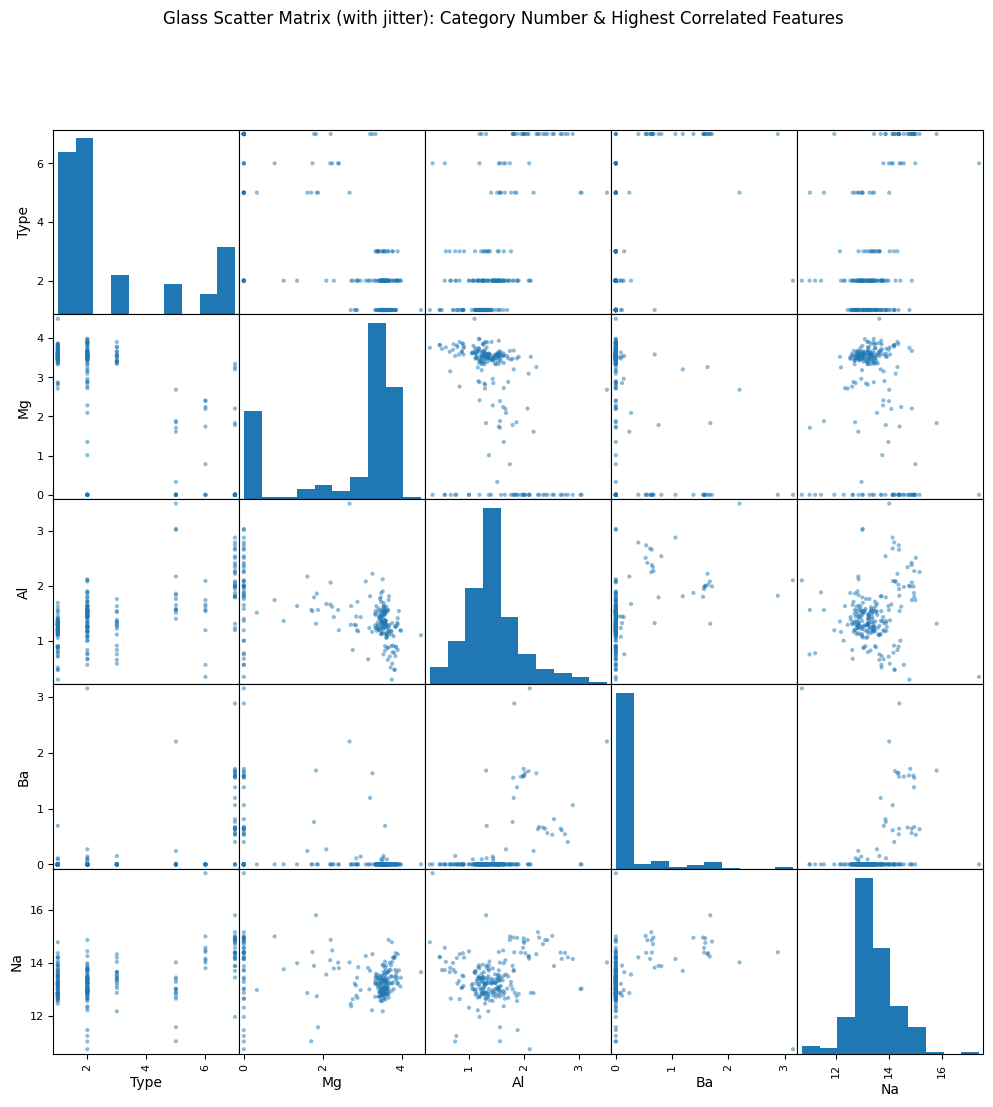

In [11]:
# We're going to make a scatter matrix with an added bit of jitter.

from pandas.plotting import scatter_matrix

glass_jittered = glass[scatter_5].copy()

for col in scatter_5:
    # Add small Gaussian noise for jitter
    glass_jittered[col] = glass[col] + np.random.normal(0, 0.05, size=len(glass))

scatter_matrix(glass[scatter_5], figsize=(12, 12))
plt.suptitle(
    "Glass Scatter Matrix (with jitter): Category Number & Highest Correlated Features"
)
plt.show()

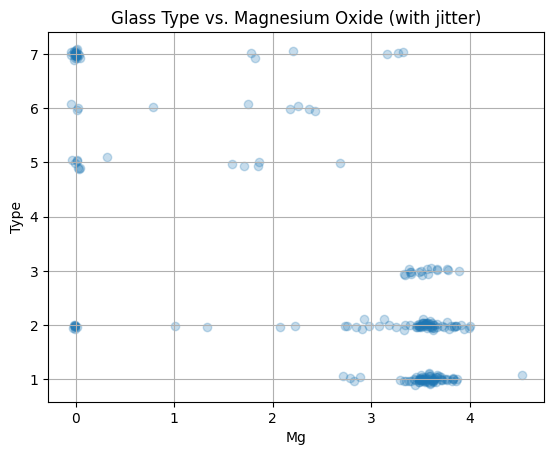

In [12]:
# Single scatterplot showing what is likely our best predictor:
# Mg

x_jitter = (
    glass["Mg"]
    + np.random.normal(0, 0.02, size=len(glass))  # jitter
)
y_jitter = (
    glass["Type"]
    + np.random.normal(0, 0.05, size=len(glass))  # jitter
)

plt.scatter(x_jitter, y_jitter, alpha=0.25)
plt.grid(True)
plt.title("Glass Type vs. Magnesium Oxide (with jitter)")
plt.xlabel("Mg")
plt.ylabel("Type")
plt.show()


Using jitter on our most highly correlated feature (Magnesium Oxide) produces an interesting result.

# **3. Feature Scaling and Splitting for Validation**

Split up the data and scale it.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
target   = 'Type'

# 60/20/20, stratified by class
train, temp = train_test_split(glass, test_size=0.4, random_state=0, stratify=glass[target])
val,   test = train_test_split(temp,  test_size=0.5, random_state=0, stratify=temp[target])

In [14]:
# --- Features (X) and target (y) ---
X_train = train.drop(columns=["Type", "Id"]).copy()
y_train = train["Type"].copy()

X_val   = val.drop(columns=["Type", "Id"]).copy()
y_val   = val["Type"].copy()

X_test  = test.drop(columns=["Type", "Id"]).copy()
y_test  = test["Type"].copy()

In [15]:
scaler = StandardScaler()
X_train[:] = scaler.fit_transform(X_train)
X_val[:]   = scaler.transform(X_val)
X_test[:]  = scaler.transform(X_test)

# **4. A) Softmax Regression**

Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution):


> A. Multinomial Logistic Regression (Softmax Regression); hyperparameters to explore: C, solver, max number of iterations.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [17]:
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test):
    results = {}


    for name, (X, y) in {
        "Train": (X_train, y_train),
        "Validation": (X_val, y_val),
        "Test": (X_test, y_test)
    }.items():
        y_pred = model.predict(X)
        results[name] = {
            "Accuracy":  accuracy_score(y, y_pred),
            "Precision": precision_score(y, y_pred, average="weighted", zero_division=0),
            "Recall":    recall_score(y, y_pred, average="weighted", zero_division=0),
            "F1":        f1_score(y, y_pred, average="weighted", zero_division=0)
        }
        print(f"\n{name} Performance:\n", classification_report(y, y_pred, zero_division=0))
    return results

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# look at LogisticRegression() documentation to figure out how to
# explain C/solver/max_iter.

# --- Grid Search for Softmax Regression ---
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'saga', 'newton-cg'],
    'max_iter': [200, 500, 1000]
}

grid_logreg = GridSearchCV(
    LogisticRegression(multi_class='multinomial'),
    param_grid_logreg,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)


grid_logreg.fit(X_train, y_train)
# Found the best Logistic Regression Parameters using grid search
print("Best Logistic Regression Params:", grid_logreg.best_params_)

#Get the model weights
best_logreg = grid_logreg.best_estimator_

# --- Evaluate ---
results_logreg = evaluate_model(best_logreg, X_train, y_train, X_val, y_val, X_test, y_test)



Best Logistic Regression Params: {'C': 10, 'max_iter': 200, 'solver': 'lbfgs'}

Train Performance:
               precision    recall  f1-score   support

           1       0.61      0.67      0.64        42
           2       0.69      0.67      0.68        46
           3       0.43      0.30      0.35        10
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00        17

    accuracy                           0.72       128
   macro avg       0.79      0.77      0.78       128
weighted avg       0.72      0.72      0.72       128


Validation Performance:
               precision    recall  f1-score   support

           1       0.50      0.50      0.50        14
           2       0.59      0.67      0.62        15
           3       0.00      0.00      0.00         4
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
      

In [20]:
best_logreg

LogisticRegression(C=10, max_iter=200, multi_class='multinomial')

In [21]:
results_logreg["Test"]

{'Accuracy': 0.4883720930232558,
 'Precision': 0.526578073089701,
 'Recall': 0.4883720930232558,
 'F1': 0.5017375033413526}

In [22]:
# Looking at all softmax models tested
# and finding others besides the best which performed well (important later)

pd.DataFrame(grid_logreg.cv_results_
             ).sort_values(by = "rank_test_score"
             ).drop(columns = ["params"])
# params column adds no information and clutters the dataset

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_solver,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
30,0.021606,0.000535,0.005815,0.000223,10.00,500,lbfgs,0.580769,0.421245,0.560741,0.643368,0.630857,0.567396,0.079224,1
27,0.025916,0.005653,0.007793,0.002475,10.00,200,lbfgs,0.580769,0.421245,0.560741,0.643368,0.630857,0.567396,0.079224,1
29,0.018614,0.001927,0.005764,0.000521,10.00,200,newton-cg,0.580769,0.421245,0.560741,0.643368,0.630857,0.567396,0.079224,1
32,0.018077,0.001323,0.005811,0.000371,10.00,500,newton-cg,0.580769,0.421245,0.560741,0.643368,0.630857,0.567396,0.079224,1
35,0.017393,0.002174,0.005162,0.000177,10.00,1000,newton-cg,0.580769,0.421245,0.560741,0.643368,0.630857,0.567396,0.079224,1
34,0.075461,0.025990,0.005259,0.001279,10.00,1000,saga,0.580769,0.421245,0.560741,0.643368,0.630857,0.567396,0.079224,1
33,0.021332,0.000751,0.005936,0.000618,10.00,1000,lbfgs,0.580769,0.421245,0.560741,0.643368,0.630857,0.567396,0.079224,1
31,0.054054,0.002120,0.005524,0.000460,10.00,500,saga,0.553441,0.421245,0.560741,0.592000,0.630857,0.551657,0.070701,8
28,0.026867,0.003282,0.006363,0.000955,10.00,200,saga,0.553441,0.443364,0.606895,0.592000,0.528571,0.544854,0.057811,9
23,0.013461,0.001700,0.005850,0.001039,1.00,500,newton-cg,0.543185,0.401577,0.593088,0.575130,0.485714,0.519739,0.069452,10


# **4. B) Support Vector Machines**

> B. Support Vector Machine (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.

In [23]:
# --- Grid Search for SVM ---
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],   # only used for poly kernel
    'gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(
    SVC(),
    param_grid_svm,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)


# Found the best Logistic Regression Parameters using grid search
grid_svm.fit(X_train, y_train)
print("Best SVM Params:", grid_svm.best_params_)

# Get the model weights
best_svm = grid_svm.best_estimator_


# --- Evaluate ---
results_svm = evaluate_model(best_svm, X_train, y_train, X_val, y_val, X_test, y_test)


Best SVM Params: {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}

Train Performance:
               precision    recall  f1-score   support

           1       0.78      0.83      0.80        42
           2       0.84      0.83      0.84        46
           3       0.89      0.80      0.84        10
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         5
           7       1.00      0.94      0.97        17

    accuracy                           0.86       128
   macro avg       0.92      0.90      0.91       128
weighted avg       0.86      0.86      0.86       128


Validation Performance:
               precision    recall  f1-score   support

           1       0.50      0.43      0.46        14
           2       0.65      0.73      0.69        15
           3       0.20      0.25      0.22         4
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           

In [24]:
pd.DataFrame(grid_svm.cv_results_
             ).sort_values(by = "rank_test_score"
             ).drop(columns = ["params"])

# Again, lots of ties. At the top, the main difference makers seem to
# be C (10 > 1 > 0.1) and kernel (linear > rbf or poly).

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
41,0.005094,0.000078,0.005753,0.000104,10.0,2,auto,rbf,0.716667,0.562406,0.679646,0.568000,0.536000,0.612544,0.071696,1
53,0.005254,0.001287,0.005604,0.001152,10.0,4,auto,rbf,0.716667,0.562406,0.679646,0.568000,0.536000,0.612544,0.071696,1
47,0.005595,0.000742,0.006151,0.000897,10.0,3,auto,rbf,0.716667,0.562406,0.679646,0.568000,0.536000,0.612544,0.071696,1
38,0.005289,0.000219,0.005795,0.000215,10.0,2,scale,rbf,0.741486,0.562406,0.638067,0.568000,0.536000,0.609192,0.074267,4
44,0.006189,0.002180,0.006214,0.001155,10.0,3,scale,rbf,0.741486,0.562406,0.638067,0.568000,0.536000,0.609192,0.074267,4
50,0.005258,0.000663,0.005994,0.000678,10.0,4,scale,rbf,0.741486,0.562406,0.638067,0.568000,0.536000,0.609192,0.074267,4
26,0.005133,0.000101,0.005929,0.000360,1.0,3,scale,rbf,0.617949,0.511538,0.657240,0.537818,0.587368,0.582383,0.052722,7
29,0.004754,0.000097,0.005522,0.000129,1.0,3,auto,rbf,0.617949,0.511538,0.657240,0.537818,0.587368,0.582383,0.052722,7
32,0.005149,0.000190,0.005744,0.000060,1.0,4,scale,rbf,0.617949,0.511538,0.657240,0.537818,0.587368,0.582383,0.052722,7
35,0.004801,0.000069,0.005662,0.000137,1.0,4,auto,rbf,0.617949,0.511538,0.657240,0.537818,0.587368,0.582383,0.052722,7


# **4. C) Random Forest**

> C. Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.

####Explanation of hyperparameters:

**n_estimators:** The number of "trees" in the forest.

**max_depth:** The maximum allowed depth of each decision tree.

**min_samples_split:** Minimum number of splits required to split an internal node.

**min_samples_leaf:** Minimum number of samples required to be at a lead node AKA the end of a branch.

**n_jobs:** number CPU cores used to build trees in parallel. -1 means use all available cores.

**max_leaf_nodes:** Limits the number of terminal lead nodes in each tree.

**Hyperparameter Grid**

This will give us a small bit of variability in our Random Forest model.

In [25]:
grid = [
    {"n_estimators": 160, "max_depth": None, "min_samples_split": 2, "min_samples_leaf": 1},
    {"n_estimators": 160, "max_depth": None, "min_samples_split": 5, "min_samples_leaf": 1},
    {"n_estimators": 160, "max_depth": 12,   "min_samples_split": 2, "min_samples_leaf": 1},
    {"n_estimators": 160, "max_depth": 12,   "min_samples_split": 5, "min_samples_leaf": 1},
    {"n_estimators": 160, "max_depth": 18,   "min_samples_split": 2, "min_samples_leaf": 1},
]


best = None

Select for Validation

In [26]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier

def eval_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="macro", zero_division=0
    )
    return acc, prec, rec, f1

In [27]:
# Select by validation F1 (macro)
for params in grid:
    rf = RandomForestClassifier(random_state=42, n_jobs=-1, **params)
    rf.fit(X_train, y_train)

    tr_acc, tr_prec, tr_rec, tr_f1 = eval_metrics(y_train, rf.predict(X_train))
    va_acc, va_prec, va_rec, va_f1 = eval_metrics(y_val,   rf.predict(X_val))

    print(f"[VAL F1={va_f1:.3f}] params={params} | Train F1={tr_f1:.3f}, Val Acc={va_acc:.3f}")

    if (best is None) or (va_f1 > best["val_f1"]):
        best = {"params": params, "val_f1": va_f1}

print("\nBest hyperparameters (by validation F1):", best["params"])

[VAL F1=0.736] params={'n_estimators': 160, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1} | Train F1=1.000, Val Acc=0.814
[VAL F1=0.695] params={'n_estimators': 160, 'max_depth': None, 'min_samples_split': 5, 'min_samples_leaf': 1} | Train F1=0.989, Val Acc=0.814
[VAL F1=0.676] params={'n_estimators': 160, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 1} | Train F1=1.000, Val Acc=0.791
[VAL F1=0.695] params={'n_estimators': 160, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 1} | Train F1=0.989, Val Acc=0.814
[VAL F1=0.736] params={'n_estimators': 160, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 1} | Train F1=1.000, Val Acc=0.814

Best hyperparameters (by validation F1): {'n_estimators': 160, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}


Measuring Feature Importance

Random Forest is very good for feature selection and can quickly tell us our most important features.

In [28]:
best_rf = RandomForestClassifier(n_estimators=160,
                                 max_depth=None,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 max_leaf_nodes=16,
                                 n_jobs=-1,
                                 random_state=42
)
best_rf.fit(X_train, y_train)

y_pred_rf = best_rf.predict(X_test)

for score, name in sorted(
    zip(best_rf.feature_importances_, X_train.columns),
    reverse=True
):
    print(f"{score:.3f} {name}")

0.164 Mg
0.159 Al
0.137 Na
0.132 RI
0.124 Ca
0.084 Ba
0.082 K
0.074 Si
0.044 Fe


Measuring Accuracy



In [29]:
from sklearn.metrics import accuracy_score

y_pred = best_rf.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))

Accuracy score: 0.813953488372093


We hit 0.81 accuracy! This is great for a Random Forest classifier.

# **5. Ensemble Learning**

Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings.

First, let's see why hard voting isn't viable...

In [30]:
from sklearn.ensemble import VotingClassifier

hardvote_classifier = VotingClassifier(
    estimators = [
        ("lr", best_logreg), # softmax
         ("svc", best_svm), # SVM
          ("rf", best_rf)], # Random Forest
    voting = "hard")

hardvote_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, max_iter=200,
                                                 multi_class='multinomial')),
                             ('svc', SVC(C=10, degree=2, gamma='auto')),
                             ('rf',
                              RandomForestClassifier(max_leaf_nodes=16,
                                                     n_estimators=160,
                                                     n_jobs=-1,
                                                     random_state=42))])

To test out our hard-voting classifier and compare it to the alternatives from part 4, we can use code adapted from the slides and predict the y-values for our validation data, with each model separately as well as the ensemble model. Accuracy is used as our metric of choice here, though others are also possible and may be preferred in some cases.

In [31]:
for clf in [best_logreg, best_svm, best_rf, hardvote_classifier]:
  clf.fit(X_train, y_train)
  y_model_pred = clf.predict(X_val)
  model_pct_acc = round(100 * accuracy_score(y_val, y_model_pred), 2)
  print(f"Accuracy of {clf.__class__.__name__} model: {model_pct_acc}%")

Accuracy of LogisticRegression model: 60.47%
Accuracy of SVC model: 62.79%
Accuracy of RandomForestClassifier model: 79.07%
Accuracy of VotingClassifier model: 67.44%


Ideally, we want our ensemble classifier to exceed the accuracy of all the models contained within it. It's however underperforming.

Realistically, because our validation data only contains a small number of records, these percents adjust at incredibly narrow rate with a small ability to improve. The differences would be easier to parse out and fully trust if our validation set were larger.

Below, another VotingClassifier() is trained using three models of each type, each with different parameters chosen based on what performed best in each section of part 4:

In [32]:
hardvote2 = VotingClassifier(
    estimators=[
        ("lr1", LogisticRegression(
            multi_class="multinomial", C=1, max_iter=500, solver="lbfgs"
        )),
        ("lr2", LogisticRegression(
            multi_class="multinomial", C=3, max_iter=500, solver="saga"
        )),
        ("lr3", LogisticRegression(
            multi_class="multinomial", C=5, max_iter=500, solver="newton-cg"
        )),
        ("svc1", SVC(
            C=10, degree=3, kernel="linear", gamma="scale"
        )),
        ("svc2", SVC(
            C=8, degree=3, kernel="linear", gamma="scale"
        )),
        ("svc3", SVC(
            C=5, degree=3, kernel="linear", gamma="scale"
        )),
        ("rf1", RandomForestClassifier(
            n_estimators=200, max_depth=10,
            min_samples_split=5, min_samples_leaf=2,
            random_state=200
        )),
        ("rf2", RandomForestClassifier(
            n_estimators=300, max_depth=10,
            min_samples_split=10, min_samples_leaf=2,
            random_state=200
        )),
        ("rf3", RandomForestClassifier(
            n_estimators=300, max_depth=20,
            min_samples_split=5, min_samples_leaf=2,
            random_state=200
        )),
    ],
    voting="hard"
)


In [33]:
for clf in [best_logreg, best_svm, best_rf, hardvote2]:
  clf.fit(X_train, y_train)
  y_model_pred = clf.predict(X_val)
  model_pct_acc = round(100 * accuracy_score(y_val, y_model_pred), 2)
  print(f"Accuracy of {clf.__class__.__name__} model: {model_pct_acc}%")

Accuracy of LogisticRegression model: 60.47%
Accuracy of SVC model: 62.79%
Accuracy of RandomForestClassifier model: 79.07%
Accuracy of VotingClassifier model: 62.79%


This result is the exact same as before! We can't use hard voting. Our Random Forest Classifier performed dramatically better than our other 2 models, and we'll need a soft voting model that takes this into account.

In [44]:
from sklearn.base import clone

svc_soft = clone(best_svm).set_params(probability=True)
softvote = VotingClassifier(
    estimators=[('lr', best_logreg), ('svc', svc_soft), ('rf', best_rf)],
    voting='soft',
    weights=[1, 1, 3],   # trust RF more
    n_jobs=-1
)

softvote.fit(X_train, y_train)
print("SoftVote (1,1,3) val acc:",
      accuracy_score(y_val, softvote.predict(X_val)))

SoftVote (1,1,3) val acc: 0.7441860465116279


We weighted our Random Forest classifier at a **3**, hoping that would give us better results. It did not. We need to give it more weight.

In [45]:
svc_soft = clone(best_svm).set_params(probability=True)
softvote = VotingClassifier(
    estimators=[('lr', best_logreg), ('svc', svc_soft), ('rf', best_rf)],
    voting='soft',
    weights=[1, 1, 5],   # trust RF more = 5
    n_jobs=-1
)

softvote.fit(X_train, y_train)
print("SoftVote (1,1,3) val acc:",
      accuracy_score(y_val, softvote.predict(X_val)))

SoftVote (1,1,3) val acc: 0.7674418604651163


Trying **5** didn't get us where we wanted to be either. Let's give Random Forest even more weight!

In [50]:
svc_soft = clone(best_svm).set_params(probability=True)
softvote = VotingClassifier(
    estimators=[('lr', best_logreg), ('svc', svc_soft), ('rf', best_rf)],
    voting='soft',
    weights=[1, 1, 6],   # trust RF more = 6
    n_jobs=-1
)

softvote.fit(X_train, y_train)
print("SoftVote (1,1,3) val acc:",
      accuracy_score(y_val, softvote.predict(X_val)))

SoftVote (1,1,3) val acc: 0.813953488372093


Success! Giving the Random Forest a weight of **6**, this soft voting ensemble model was marginally more successful at classifying the validation dataset! We rely on the strength of our Random Forest model to get us better classifications.